# Individual Assignment – Classification Notebook
Author: Ashish Sehrawat

Dataset: Bank Marketing Dataset


16 phases of the AI lifecycle

# Identify and formulate the problem

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


Its a classification exercise.
Total number of attributes: 17
Y variable: Will Subscribe to product 'yes' or 'No'


Source

Dataset Information

**Features:**

Input variables: # bank client data:
1 - Age (numeric)
2 - Job : type of job (categorical)
3 -Marital : marital status (categorical)
4 - Education (categorical)
5 - Default: has credit in default? (categorical)
6 - Housing: has housing loan? (categorical)
7 - Loan: has personal loan? (categorical)

related with the last contact of the current campaign:

8 - Contact: contact communication type (categorical)
9 - Month: last contact month of year (categorical)
10 - Day_of_week: last contact day of the week (categorical)
11 - Duration: last contact duration, in seconds (numeric)

**Others:**

12 - Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - Previous: number of contacts performed before this campaign and for this client (numeric)
15 - Poutcome: outcome of the previous marketing campaign (categorical)

**Social and economic context attributes:**

16 - Emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - Cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - Cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - Nr.employed: number of employees - quarterly indicator (numeric)


# Review lit, ethics, SOTA algorithms and pretrained models

Litrature reference: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Decision support systems (DSSs) use information technology to support
managerial decision making
Marketing selling campaigns constitute a typical strategy to enhance
business. Companies use direct marketing when targeting segments of
customers by contacting them to meet a specific goal
LR and DT have the advantage of fitting models that tend to be easily understood
by humans, while also providing good predictions in classification
tasks. NN and SVM are more flexible (i.e., no a priori restriction is imposed)
when compared with classical statistical modeling (e.g., LR) or
even DT, presenting learning capabilities that range fromlinear to complex
nonlinear mappings
However, unexplainable models can be
opened by using a sensitivity analysis, which allows us to measure the
importance and effect of particular input in the model output response
The large number (150) of potential useful features demanded a
stricter choice of relevant attributes. Feature selection is often a key
, since it is useful to discard irrelevant inputs, leading to simpler
data-drivenmodels that are easier to interpret and that tend to provide
better predictive performances
In the second step, an automated selection approach is adopted,
based an adapted forward selection method

Business Scenerio: Utility
of such model, which allows campaign managers to increase efficiency
through cost reduction (less calls made) and still reaching a large portion
of successful contacts

Possible Business questions:

1: Is offered rate relevant? 5
2: Isgenderrelevant? 3
3: Is agent experience relevant? 3
4: Are social status and stability relevant? 5
5: Isclient–bank relationship relevant? 11
6: Are bank blocks (triggered to prevent certain operations) relevant? 6
7: Is phone call context relevant? 4
8: Are date and time conditions relevant? 3
9: Are bank profiling indicators relevant? 7
10: Are social and economic indicators relevant? 11
11: Are financial assets relevant? 3
12: Is residence district relevant? 1
13: Can age be related to products with longer term periods? 3
14: Are web page hits (for campaigns displayed in bank web sites)
relevant? 4
Number of features after business knowledge selection 69
Number of features after first feature selection phase 22

Predictive capabilities have to be realistic and robust.

We also compared four
 models: logistic regression, decision trees (DTs), neural network (NN) and support vector machine
Using
two metrics, area of the receiver operating characteristic curve (AUC) and area of the LIFT cumulative curve
(ALIFT)
the four models were tested on an evaluation set, using the data avaiable from UCI website

# Data preparation (SVOT)

**Source**

Dataset Information

**Features:**

Input variables: # bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown') 8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**Install and Import libraries**

In [625]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The following two commands ignore some warnings which are generally thrown due to version updates.
import warnings
warnings.filterwarnings("ignore")

# Ex: import numpy library (as a given short name) / Here we import the entire library (called alias)
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.feature_selection import RFE


# For Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Explainability and visualisation libraries
from xgboost import plot_tree
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
from xgboost import plot_tree
from lightgbm import plot_importance

# install shap explainability
!pip install shap
import shap

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Model Deployment
# Shap explainability
!pip install shap

!pip install pandas-datareader
!pip install yfinance
!pip install fastapi
!pip install colabcode

from pandas_datareader import data as pdr
from pydantic import BaseModel
from fastapi import FastAPI
import pickle


In [626]:
from sklearn.decomposition import FactorAnalysis

In [627]:
# Load the dataset
df=pd.read_csv('/content/bank-term-deposit.csv')


# Data exploration

We have two types of variables in our data set. These are Continuous Variables and Categorical Variables.

**Continuous Variables**
'age‘ , 'duration', 'campaign', ‘pdays ‘, 'previous', 'emp.var.rate‘ 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'

**Categorical Variables**
'job', 'marital', 'education', 'default', 'housing', 'loan’ 'contact', 'month', 'day_of_week', 'poutcome', 'y'

In [628]:
print("Describe Dataset","\n")
print(df.info())
print(df.head(10))
print(df.describe())

Describe Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

**Finding Top 5 of highly successful campaigns**

We will groupby then count

In [629]:
  
df.groupby(['campaign'])['y'].count().reset_index().sort_values(by='y', ascending=False).iloc[:5]

campaign      y
0         1  17642
1         2  10570
2         3   5341
3         4   2651
4         5   1599

In [630]:
print("Continuous Variables","\n")
continous_vars=df.describe().columns
print(continous_vars)

Continuous Variables 

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


**Assessing our target audience:**
Which customers were more likely to subscribe to the term deposit

Text(0.5, 1.0, 'Purchase Frequency for Job Title')

Text(0.5, 0, 'Job')

Text(0, 0.5, 'Frequency of Purchase')

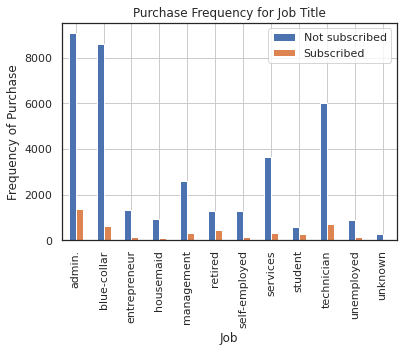

In [631]:
table = pd.crosstab(df.job, df.y)
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

The target customers are admins, blue-collars and techinicians 

In [632]:
table = pd.crosstab(df.job, df.y)
table = round(table.div(table.sum(axis=1), axis=0).mul(100), 2)
table.columns=['notsubcribed', 'subcribed']
table.sort_values(by=['subcribed'], ascending=False).loc[:, 'subcribed']

job
student          31.43
retired          25.23
unemployed       14.20
admin.           12.97
management       11.22
unknown          11.21
technician       10.83
self-employed    10.49
housemaid        10.00
entrepreneur      8.52
services          8.14
blue-collar       6.89
Name: subcribed, dtype: float64

**Role of marital status in subscription behaviour**

Text(0.5, 1.0, 'Frequency of Marital Status vs Purchase')

Text(0.5, 0, 'Marital Status')

Text(0, 0.5, 'Proportion of Customers')

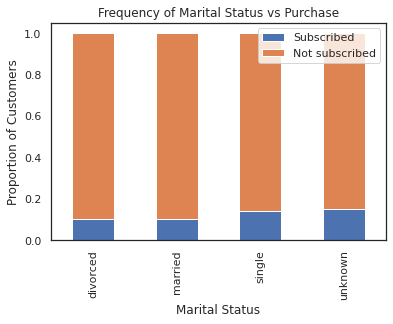

In [633]:
table = pd.crosstab(df.marital,df.y)
table = table.div(table.sum(1).astype(float), axis=0)
table.columns = ['Not subscribed', 'Subscribed']
# Ordering stacked bars and plot the chart
table[['Subscribed', 'Not subscribed']].plot(kind='bar', stacked=True)
plt.title('Frequency of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

In [634]:
print("Categorical Variables","\n")
categorical_vars=df.describe(include=[object]).columns
print(categorical_vars)

Categorical Variables 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


**Visualizing: Continuous Variables**

Continuous Variables Visualization 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3cb6683d0>,
      dtype=object)

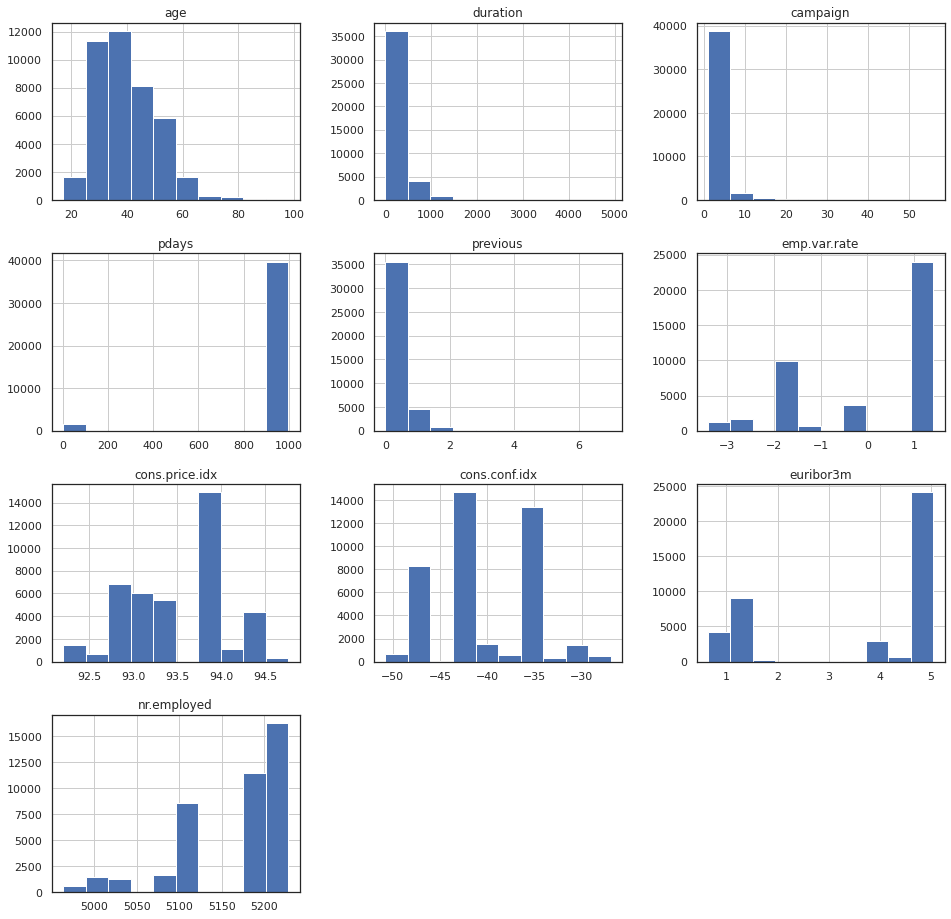

In [635]:
print("Continuous Variables Visualization","\n")
df.hist(column=continous_vars,figsize=(16,16))
plt.show()

**Visualizing: Categorical Variables**

Categorical Variables Visualization 



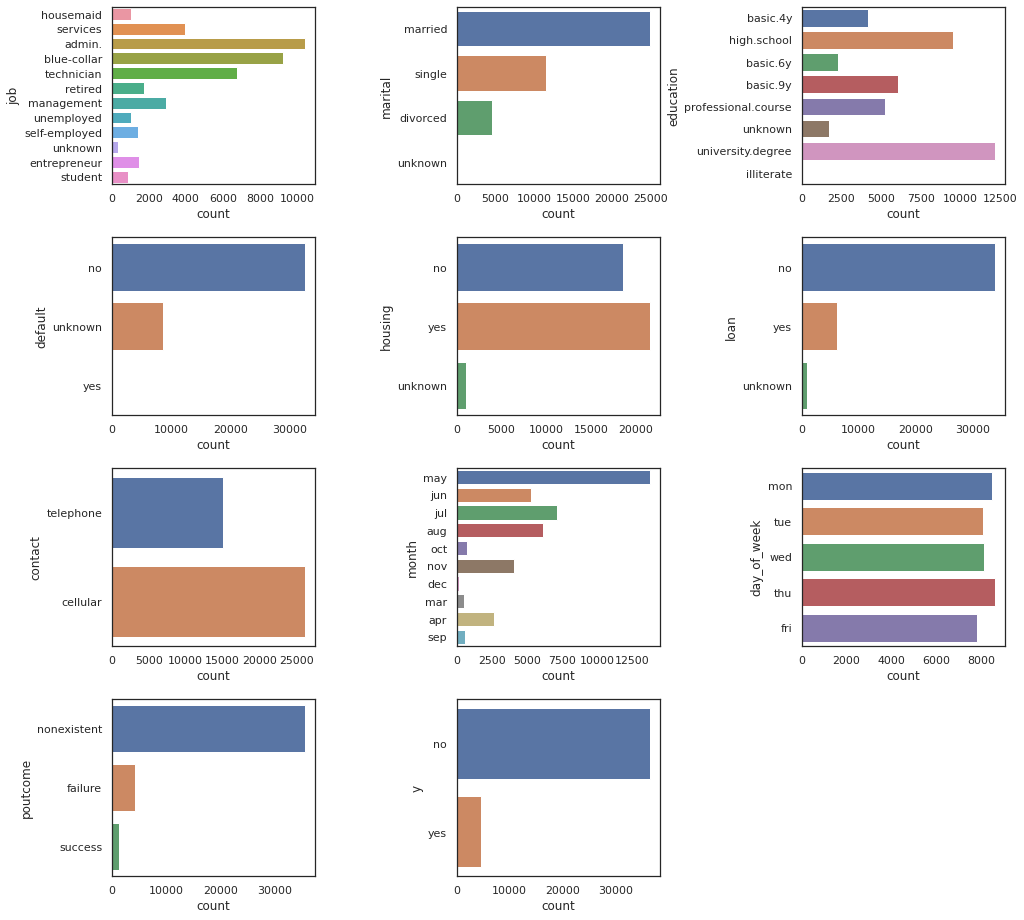

In [636]:
print("Categorical Variables Visualization","\n")
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)
plt.show()

# External/strategic data acquisition

# Data pre-processing

**Convert pdays column numeric to categorical**

In [637]:
  
df["pdays_cat"]=[0 if each==999  else 1 for each in df.pdays]
df=df.drop(["pdays"],axis=1)

In [638]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

**Heat map/ Correlations**

Correlation Matrix 



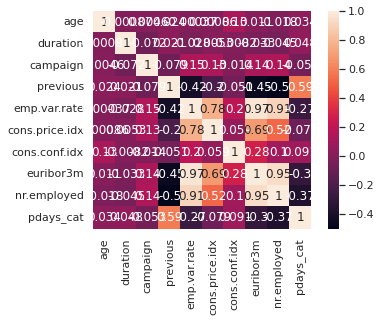

In [639]:

print("Correlation Matrix","\n")    
correlation=df.corr(method="pearson")
#plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
#plt.show()

**Since we are building churn prediction model, checking if the dataset is imbalanced**

In [640]:

print(df['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


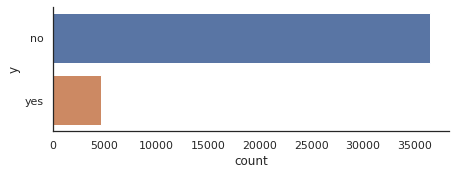

In [641]:
ax = sns.catplot(y="y", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

In [642]:
#Checking max value in education to replace unknown values later
print(df['education'].value_counts())

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


**Data Manipulation**

Although "duration" feature important, this value is not known before a call is performed. Hence; this feature should been discarded from the list of features to predict

We found a high correlation between 4 columns based on the Heat Map Method. These columns are cons.price.idx, euribor3m, nr.employed,emp.var.rate. Therefore we applied the factor analysis method and created a new column called X_factor. After this process we dropped these columns.

Duration column/attribute highly affects the output target, we also dropped the Duration column. Because, the duration is not known before a call is performed.

We have numeric attribute named pdays means that number of days that passed by after the client was last contacted from a previous campaign (There are 999 and other numeric values inside of this column. 999 means client was not previously contacted. We converted the 'pdays’ column numeric to categorical. If the value is equal to 999, we put the '0' instead of '999', otherwise we put 1. We dropped the regular 'pdays' column and set column name as 'pdays_cat’


Log tranform campaign column to make it normal distribution
Replacing unknown values in education column with maximum value i..e university education

**One-Hot Encoding**

We applied One Hot Encoding method to categorical data with using get dummies function. One hot encoding is a process by which categorical variables are converted into matrix form with 1 and 0 values.

In [643]:
# Log transform campagin col as its skewed, to make it normal distribution
df['campaign']=np.log(df.campaign)

# Value enrichment, replacing unknown with max value of education
df['education'].replace({'unknown':'university.degree'}, inplace=True)

columns = df.select_dtypes(include=[object]).columns
df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
# Duration information is not avaiable before call is made, dropping this feature 
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome', 'y','duration'], axis =1)
print("\n","Describe Dataset_v2","\n")

# Renaming column to remove unnecessary characters in name
df.rename(columns = {'education_basic.4y' : 'education_basic_4y', 'education_basic.6y' : 'education_basic_6y','education_basic.9y' : 'education_basic_9y','job_blue-collar':'job_blue_collar',
'job_self-employed':'job_self_employed',
'emp.var.rate':'emp_var_rate',
'cons.price.idx':'cons_price_idx',
'cons.conf.idx':'cons_conf_idx',
'nr.employed':'nr_employed',
'education_high.school':'education_high_school',
'education_professional.course':'education_professional_course',
'education_university.degree':'education_university_degree'}, inplace = True)


print(df.info(),"\n \n \n")


 Describe Dataset_v2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  float64
 2   previous                       41188 non-null  int64  
 3   emp_var_rate                   41188 non-null  float64
 4   cons_price_idx                 41188 non-null  float64
 5   cons_conf_idx                  41188 non-null  float64
 6   euribor3m                      41188 non-null  float64
 7   nr_employed                    41188 non-null  float64
 8   pdays_cat                      41188 non-null  int64  
 9   job_admin.                     41188 non-null  uint8  
 10  job_blue_collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid         

# Data augmentation

**No missing or unkown values in data**


**Data Normalization**

Data Normalization
Normalized our numerical data as data preparation. Normalization is to change the values of numeric columns in the data set to use a common scale, without distorting differences in the ranges of values or losing information. Using MinMaxScaler function.

In [644]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(df),columns=df.columns)

In [645]:
y = data_scaled.y_yes
data_scaled = data_scaled.drop(['y_yes','y_no'], axis = 1)

In [646]:
#Since we are building churn prediction model, let's check if the dataset is imbalanced
print(data_scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   campaign                       41188 non-null  float64
 2   previous                       41188 non-null  float64
 3   emp_var_rate                   41188 non-null  float64
 4   cons_price_idx                 41188 non-null  float64
 5   cons_conf_idx                  41188 non-null  float64
 6   euribor3m                      41188 non-null  float64
 7   nr_employed                    41188 non-null  float64
 8   pdays_cat                      41188 non-null  float64
 9   job_admin.                     41188 non-null  float64
 10  job_blue_collar                41188 non-null  float64
 11  job_entrepreneur               41188 non-null  float64
 12  job_housemaid                  41188 non-null 

**Test - Train Data Split**

In [647]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=42)

**Oversampling** the data due to unbalanced classes

Y variable has mostly‘no’ outcome on our dataset. In oversampling, for every observation in the majority class, we randomly select an observation from the minority class with replacement. The end result is the same number of observations from the minority and majority classes.

In [648]:

def overSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=888) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [649]:
X_train,y_train=overSample(X_train, y_train)

# Prototype and AI model

# Develop a benchmark

**Logistic regression**

In [650]:

churnLogReg = LogisticRegression(random_state = 42)
# fit the model on the training data
churnLogReg.fit(X_train, y_train)
y_pred_lr = churnLogReg.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [651]:
rfe=RFE(lr,10)
rfe=rfe.fit(X_train,y_train)
print("Feature Selection","\n")
print(X_train[X_train.columns[rfe.ranking_==1].values].columns,"\n")

Feature Selection 

Index(['previous', 'emp_var_rate', 'cons_price_idx', 'euribor3m', 'pdays_cat',
       'education_illiterate', 'month_jun', 'month_mar', 'month_may',
       'month_nov'],
      dtype='object') 



**Cross Validation** 10 iterations

In [652]:

accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("Accuracy (mean): %",accuracies.mean()*100)
print("std: %",accuracies.std()*100)

Accuracy (mean): % 74.04342622670542
std: % 0.4392815688904554


In [653]:
scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=10,)
print ("MAE (mean): %" , scores.mean())

MAE (mean): % -0.25956573773294583


True Positive (TP) These are client in which model predicted Yes (subscribed to a term deposit) 

True Negative (TN) model predicted no, and they don't subscribe to a term deposit

False Positive (FP) model predicted yes, but they don't actually subscribe to a term deposit (Also Known as Type I error)

False Negative (FN) model predicted no, but they actually subscribe to a term deposit (Also known as Type II error)

Confusion Matrix 



Text(80.90000000000006, 0.5, 'Actual label')

Text(0.5, 12.5, 'Predicted label')

Text(0.5, 1.0, 'Accuracy Score: 0.829')

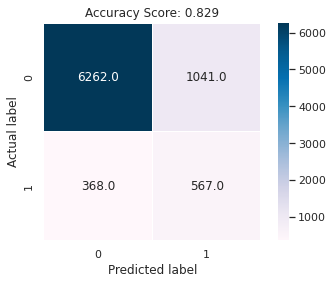

In [654]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, prediction),3) 
cm1 = cm(y_test, prediction)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

# Build several models

**Fit RandomForest Classifier**

In [655]:

rfChurn = RandomForestClassifier()
rfChurn.fit(X_train, y_train)
y_pred_rf = rfChurn.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Decision tree** 

In [656]:

churnDecisionTree = tree.DecisionTreeClassifier()
churnDecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**K-nearest neighbour**

In [657]:

churnKNN = neighbors.KNeighborsClassifier()
churnKNN.fit(X_train,y_train)
y_pred_knn = churnKNN.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Neural network - Multi-layer Perceptron**

In [658]:

churnMLP = MLPClassifier()
churnMLP.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

**XGBoost**

In [659]:

churnXGB = xgb.XGBClassifier()
churnXGB.fit(X_train,y_train)
y_pred_xgb = churnXGB.predict(X_test)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Light GBM**

In [660]:
from lightgbm import LGBMClassifier
import lightgbm as ltb
churnLGBM = ltb.LGBMClassifier(max_depth= 4, gamma= 0.1, subsample= 0.8,seed=27,colsample_bytree=0.8,n_estimators=90,min_child_weight=1)
churnLGBM.fit(X_train,y_train)
y_pred_lgbm = churnLGBM.predict(X_test)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               gamma=0.1, importance_type='split', learning_rate=0.1,
               max_depth=4, min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=90, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               seed=27, silent=True, subsample=0.8, subsample_for_bin=200000,
               subsample_freq=0)

In [661]:
print(churnXGB.score(X_test, y_test))

0.8386744355426075


# Validate all models

In [662]:
classifiers = [ churnMLP, churnXGB, churnKNN, churnDecisionTree, churnLogReg,rfChurn]
evalTable = PrettyTable(['Name', 'Accuracy', 'F1-score', 'ROC AUC score', 'AP score'])
for i in classifiers:
  # Predict the class
  y_predict = i.predict(X_test)
  # Predict probabilities and retrieve just the probabilities for the positive class
  y_prob = i.predict_proba(X_test)[:, 1]
  evalTable.add_row( [ type(i).__name__, (round(i.score(X_test, y_test),3)), 
                      (round(metrics.f1_score(y_test, y_predict),3)), 
                      (round(metrics.roc_auc_score(y_test, y_prob),3)), 
                      (round(metrics.average_precision_score(y_test, y_prob),3)),] )
print(evalTable)

+------------------------+----------+----------+---------------+----------+
|          Name          | Accuracy | F1-score | ROC AUC score | AP score |
+------------------------+----------+----------+---------------+----------+
|     MLPClassifier      |  0.767   |  0.341   |     0.714     |  0.333   |
|     XGBClassifier      |  0.839   |  0.461   |     0.793     |  0.453   |
|  KNeighborsClassifier  |   0.77   |  0.341   |     0.689     |  0.225   |
| DecisionTreeClassifier |   0.84   |   0.31   |     0.613     |  0.176   |
|   LogisticRegression   |  0.827   |  0.445   |     0.782     |  0.425   |
| RandomForestClassifier |   0.88   |  0.416   |     0.758     |  0.346   |
+------------------------+----------+----------+---------------+----------+


XBGBoost, Logistic Regression algorithm have better performance than other algorithms. 

Both have high value of AUC and corresponding high value of AP score aswell compared to other models


In classification, unbalanced dataset/classes can be there and evaluation metric like accuracy might not be right choice as it could indicate over fitting and model would fail in unseen data.
Accuracy is an unreliable metric when the dataset is imbalanced.

For such cases Precision-Recall (PR) curves should be used as Pr curve is more sensitive to the positive class, TP and AUC is called Average Precision (AP). Here, we look for point of Recall when Precision starts to drop

ROC-AUC is area under curve and a measure of performance across all possible thresholds

F1 score is harmonic mean of precision and recall and deals better with outliers

# Validate secondary metrics

**All ROC curves**

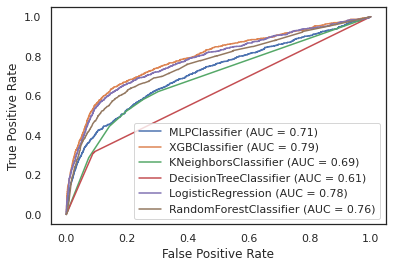

In [663]:

all_axes = plt.gca()
for i in classifiers:
    metrics.plot_roc_curve(i, X_test, y_test, ax=all_axes)

**All precision-recall curves**

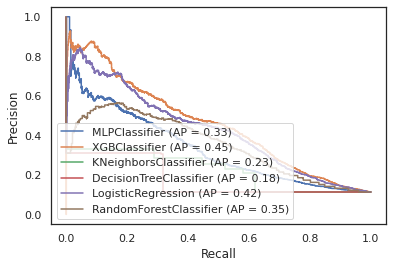

In [664]:

all_axes = plt.gca()
for i in classifiers:
    metrics.plot_precision_recall_curve(i, X_test, y_test, ax=all_axes)

**Hyper parameter tuning**

**Grid Search** - to find best model parameters

In [665]:
parameters = {
    'max_depth': [4],
    'gamma': [0.1],
    'subsample': [0.8],
    
   # 'seed':[27,88]
}
clf = GridSearchCV(churnXGB, parameters)
clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.1], 'max_depth': [4], 'subsample': [0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

Best params: {'gamma': 0.1, 'max_depth': 4, 'subsample': 0.8}
Best validation score = 0.7552402120020516


In [666]:
#churnXGB = xgb.XGBClassifier(max_depth=4, gamma= 0.2, subsample= 0.8)
churnXGB = xgb.XGBClassifier(max_depth= 4, gamma= 0.1, subsample= 0.8,seed=27,colsample_bytree=0.8,n_estimators=90,min_child_weight=1,nthread=4)
churnXGB.fit(X_train,y_train)
y_pred_xgb = churnXGB.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=90, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [667]:
classifiers = [churnXGB]
evalTable = PrettyTable(['Name', 'Accuracy', 'F1-score', 'ROC AUC score', 'AP score'])
for i in classifiers:
  # Predict the class
  y_predict = i.predict(X_test)
  # Predict probabilities and retrieve just the probabilities for the positive class
  y_prob = i.predict_proba(X_test)[:, 1]
  evalTable.add_row( [ type(i).__name__, (round(i.score(X_test, y_test),3)), 
                      (round(metrics.f1_score(y_test, y_predict),3)), 
                      (round(metrics.roc_auc_score(y_test, y_prob),3)), 
                      (round(metrics.average_precision_score(y_test, y_prob),3)),] )
print(evalTable)

+---------------+----------+----------+---------------+----------+
|      Name     | Accuracy | F1-score | ROC AUC score | AP score |
+---------------+----------+----------+---------------+----------+
| XGBClassifier |  0.837   |  0.464   |     0.792     |  0.465   |
+---------------+----------+----------+---------------+----------+


This approach is used to combine different models based on specific evalution crieria to maximize the outcome for business

**Ensembling: Combining Model outcomes**

Ensemling produces classifier with higher F1 score of 47% with 20-30-20-30 weighted combination of the Logestic regression, XGB, Random Forest and KNN models

Highest accuracy of 89% is produced by  with 50-50 weighted combination of the Logestic regression and KNN



**Combine predictions 1**

In [668]:


def computePreds(preds, cutoff) :
    preds[preds > cutoff] = 1
    preds[preds <= cutoff] = 0
    return(preds)

names = []
scores50 = []
scores75 = []
range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1]
for a in range :
    for b in range : 
        for c in range :
            for d in range :
                if ((a + b + c + d) == 1) :
                    name = str(a) + "-" + str(b) + "-" + str(c) + "-" + str(d)
                    names.append(name)
                    preds = (a * y_pred_lr) + (b * y_pred_xgb)  + (c * y_pred_rf) + (d * y_pred_knn)
                    preds = computePreds(preds, 0.5)
                    score = f1_score(y_test, preds)
                    scores50.append(score)
                    preds = computePreds(preds, 0.75)
                    score = f1_score(y_test, preds)
                    scores75.append(score)

df = pd.DataFrame()
df.loc[:, "names"] = pd.Series(names)
df.loc[:, "scores50"] = pd.Series(scores50)
df.loc[:, "scores75"] = pd.Series(scores75)
print("Head : ")
display(df.sort_values("scores50", ascending = False).head(10))
display(df.sort_values("scores75", ascending = False).head(10))
print("Tail : ")
display(df.sort_values("scores50", ascending = False).tail(10))
display(df.sort_values("scores75", ascending = False).tail(10))

Head : 


names  scores50  scores75
37     0-0.5-0.1-0.4  0.472911  0.472911
38     0-0.5-0.2-0.3  0.472911  0.472911
39     0-0.5-0.3-0.2  0.472911  0.472911
40     0-0.5-0.4-0.1  0.472911  0.472911
118  0.2-0.3-0.2-0.3  0.472433  0.472433
81   0.1-0.4-0.1-0.4  0.472433  0.472433
82   0.1-0.4-0.2-0.3  0.472194  0.472194
83   0.1-0.4-0.3-0.2  0.472194  0.472194
148  0.3-0.2-0.3-0.2  0.471922  0.471922
172  0.4-0.1-0.4-0.1  0.471922  0.471922

names  scores50  scores75
37     0-0.5-0.1-0.4  0.472911  0.472911
38     0-0.5-0.2-0.3  0.472911  0.472911
39     0-0.5-0.3-0.2  0.472911  0.472911
40     0-0.5-0.4-0.1  0.472911  0.472911
118  0.2-0.3-0.2-0.3  0.472433  0.472433
81   0.1-0.4-0.1-0.4  0.472433  0.472433
82   0.1-0.4-0.2-0.3  0.472194  0.472194
83   0.1-0.4-0.3-0.2  0.472194  0.472194
148  0.3-0.2-0.3-0.2  0.471922  0.471922
172  0.4-0.1-0.4-0.1  0.471922  0.471922

Tail : 


names  scores50  scores75
60     0.1-0.1-0-0.8  0.340885  0.340885
103  0.2-0.1-0.1-0.6  0.340885  0.340885
24     0-0.3-0.1-0.6  0.340885  0.340885
54     0.1-0-0.3-0.6  0.340885  0.340885
53     0.1-0-0.1-0.8  0.340885  0.340885
52       0.1-0-0-0.9  0.340885  0.340885
109    0.2-0.2-0-0.6  0.340885  0.340885
73     0.1-0.3-0-0.6  0.340885  0.340885
1        0-0-0.1-0.9  0.340885  0.340885
0            0-0-0-1  0.340885  0.340885

names  scores50  scores75
60     0.1-0.1-0-0.8  0.340885  0.340885
103  0.2-0.1-0.1-0.6  0.340885  0.340885
24     0-0.3-0.1-0.6  0.340885  0.340885
54     0.1-0-0.3-0.6  0.340885  0.340885
53     0.1-0-0.1-0.8  0.340885  0.340885
52       0.1-0-0-0.9  0.340885  0.340885
109    0.2-0.2-0-0.6  0.340885  0.340885
73     0.1-0.3-0-0.6  0.340885  0.340885
1        0-0-0.1-0.9  0.340885  0.340885
0            0-0-0-1  0.340885  0.340885

**Combine predictions 2**

In [669]:

def computePreds(preds, cutoff) :
    preds[preds > cutoff] = 1
    preds[preds <= cutoff] = 0
    return(preds)

names = []
scores50 = []
scores75 = []
range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1]
for a in range :
    for b in range : 
        for c in range :
            for d in range :
                if ((a + b + c + d) == 1) :
                    name = str(a) + "-" + str(b) + "-" + str(c) + "-" + str(d)
                    names.append(name)
                    preds = (a * y_pred_lr) + (b * y_pred_xgb)  + (c * y_pred_rf) + (d * y_pred_knn)
                    preds = computePreds(preds, 0.5)
                    score = accuracy_score(y_test, preds)
                    scores50.append(score)
                    preds = computePreds(preds, 0.75)
                    score = accuracy_score(y_test, preds)
                    scores75.append(score)

df = pd.DataFrame()
df.loc[:, "names"] = pd.Series(names)
df.loc[:, "scores50"] = pd.Series(scores50)
df.loc[:, "scores75"] = pd.Series(scores75)
print("Head : ")
display(df.sort_values("scores50", ascending = False).head(10))
display(df.sort_values("scores75", ascending = False).head(10))
print("Tail : ")
display(df.sort_values("scores50", ascending = False).tail(10))
display(df.sort_values("scores75", ascending = False).tail(10))

Head : 


names  scores50  scores75
192    0.5-0-0.5-0  0.893421  0.893421
41     0-0.5-0.5-0  0.893057  0.893057
121  0.2-0.3-0.5-0  0.892692  0.892692
173  0.4-0.1-0.5-0  0.892692  0.892692
85   0.1-0.4-0.5-0  0.892692  0.892692
150  0.3-0.2-0.5-0  0.892692  0.892692
56   0.1-0-0.5-0.4  0.880554  0.880554
137  0.3-0-0.5-0.2  0.880554  0.880554
100  0.2-0-0.5-0.3  0.880554  0.880554
166  0.4-0-0.5-0.1  0.880554  0.880554

names  scores50  scores75
192    0.5-0-0.5-0  0.893421  0.893421
41     0-0.5-0.5-0  0.893057  0.893057
121  0.2-0.3-0.5-0  0.892692  0.892692
173  0.4-0.1-0.5-0  0.892692  0.892692
85   0.1-0.4-0.5-0  0.892692  0.892692
150  0.3-0.2-0.5-0  0.892692  0.892692
56   0.1-0-0.5-0.4  0.880554  0.880554
137  0.3-0-0.5-0.2  0.880554  0.880554
100  0.2-0-0.5-0.3  0.880554  0.880554
166  0.4-0-0.5-0.1  0.880554  0.880554

Tail : 


names  scores50  scores75
61   0.1-0.1-0.2-0.6  0.770454  0.770454
67   0.1-0.2-0.1-0.6  0.770454  0.770454
73     0.1-0.3-0-0.6  0.770454  0.770454
96       0.2-0-0-0.8  0.770454  0.770454
97     0.2-0-0.2-0.6  0.770454  0.770454
103  0.2-0.1-0.1-0.6  0.770454  0.770454
109    0.2-0.2-0-0.6  0.770454  0.770454
1        0-0-0.1-0.9  0.770454  0.770454
133    0.3-0-0.1-0.6  0.770454  0.770454
0            0-0-0-1  0.770454  0.770454

names  scores50  scores75
61   0.1-0.1-0.2-0.6  0.770454  0.770454
67   0.1-0.2-0.1-0.6  0.770454  0.770454
73     0.1-0.3-0-0.6  0.770454  0.770454
96       0.2-0-0-0.8  0.770454  0.770454
97     0.2-0-0.2-0.6  0.770454  0.770454
103  0.2-0.1-0.1-0.6  0.770454  0.770454
109    0.2-0.2-0-0.6  0.770454  0.770454
1        0-0-0.1-0.9  0.770454  0.770454
133    0.3-0-0.1-0.6  0.770454  0.770454
0            0-0-0-1  0.770454  0.770454

In [670]:
lr_probs = churnXGB.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

# calculate accuracy metrices for random forest
lr_auc = roc_auc_score(y_test, lr_probs)
print('Accuracy=%.3f' % (accuracy_score(y_test, rfChurn.predict(X_test))))
print('ROC AUC=%.3f' % (lr_auc))
print('F1 Score=%.3f' % (f1_score(y_test, rfChurn.predict(X_test))))

Accuracy=0.880
ROC AUC=0.792
F1 Score=0.416


# Develop and improve model explainability

**Plot features importances**

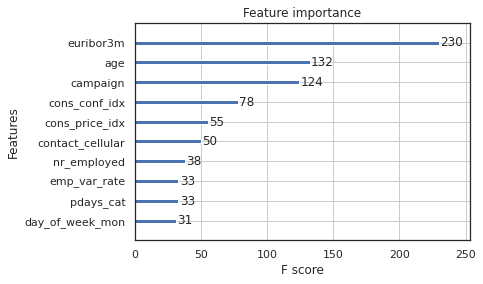

In [671]:

#imp = pd.Series(data=churnXGB.feature_importances_, index=X.columns).sort_values(ascending=False)
#plt.figure(figsize=(10,12))
#plt.title("Feature importance")
#ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

# Built-in function in XGBoost library for input variable (input feature) importance
xgb.plot_importance(churnXGB, max_num_features=10) # top 10 most important features

We can see here euibor3m(3 month rate), age and campaign are most important features to determine model outcome.

Summary plot of SHAP values indicate how each feature is important towards the target prediction. As per the below plot, 5 day moving average(SMA_5) is the most impactful feature.

Feature importance: Variables are ranked in descending order of the importance. SMA_5 is the most important feature towards the prediction.

Impact: The horizontal location of each feature indicate whether the effect of that value is associated with a higher or lower prediction.

Color Scheme: Color indicate whether that variable has positive impact (in red) or negative impact (in blue) for that observation.

**SHAP Beeswarm Plot**

We can see over all nr_employed, 3 month rate have highest impact on model outcome. Houseing_no, previous have least explainability. But, this doesnot determine causation.
Here outcome is if client subscribed a term deposit

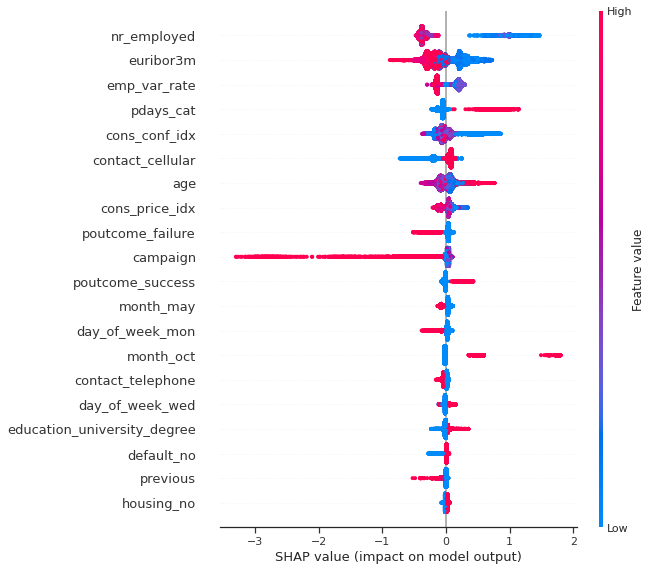

In [672]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(churnXGB)

# Calculate Shap values
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

**Individual force plots**
The individual force plot indicate how SHAP values impact for each of the prediction. Here we are selecting the one row to analyze how each feature impact towards the target prediction.
In this case age and nr_employed features have highest impact

In [673]:
# print the JS visualization code to the notebook
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[2,:], X_train.iloc[2,:])

In [674]:
print("Row values")
print(X_train.iloc[2,:])
print("Actual Value")
print(y_train.iloc[2])
print("Mean values")
X_train.mean()

Row values
age                     0.518519
campaign                0.445119
previous                0.142857
emp_var_rate            0.333333
cons_price_idx          0.269680
                          ...   
day_of_week_tue         0.000000
day_of_week_wed         0.000000
poutcome_failure        1.000000
poutcome_nonexistent    0.000000
poutcome_success        0.000000
Name: 30592, Length: 61, dtype: float64
Actual Value
0.0
Mean values


age                     0.288772
campaign                0.147421
previous                0.044200
emp_var_rate            0.607729
cons_price_idx          0.500639
                          ...   
day_of_week_tue         0.200171
day_of_week_wed         0.199966
poutcome_failure        0.115097
poutcome_nonexistent    0.783450
poutcome_success        0.101453
Length: 61, dtype: float64

**Decision plot** tracks how a decision is made by a particular case(individual predictions). Its based on game theory as tracks evolving model outcome as features come in play at each step of decision.

Here, age, 3 month rate determine model outcome for this case which is a client didnt subscribed a term deposit

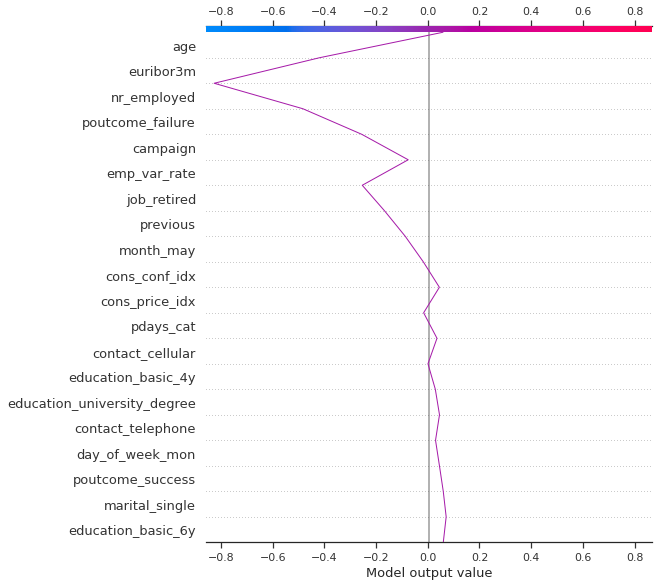

In [675]:
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(X_train.iloc[2,:]),
                   feature_names=X_train.columns.tolist()
                   )

In [676]:
y_train[0:10]

12556    0.0
35451    0.0
30592    0.0
17914    0.0
3315     0.0
29191    0.0
30549    0.0
6098     0.0
6252     0.0
13373    0.0
Name: value, dtype: float64

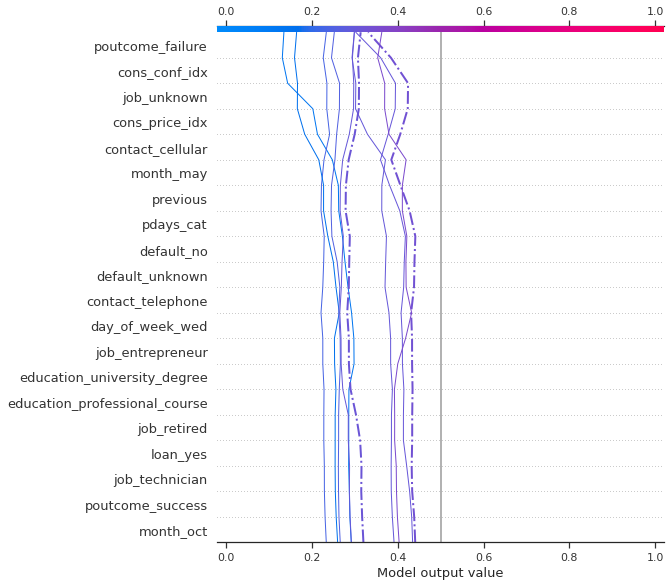

In [677]:
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(X_test.iloc[0:10,:]),
                   feature_names=X_train.columns.tolist(),
                    highlight=[2,5],
                    feature_order='hclust',
                   link='logit'
                   )

**Dependence plots**
The partial dependence plot shows the marginal effect of one or two variables towards the predicted outcome. It indicate the relationship between the target and the variable whether its linear, monotonic, or more complex.

Thsi one reflects for age vs nr_employed

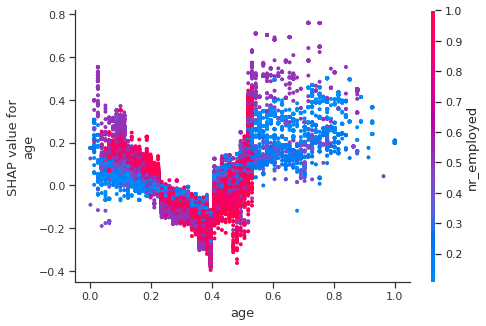

In [678]:
shap.dependence_plot("age", shap_values, X_train)


**Collective force plot**
The collective force plot shows show all the features that contribute toward the target prediction. This is the individual force plot stacked vertically across all the data points.

In [679]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_train.iloc[:1000,:])

# Deploy models

Now that we have developed a model, the next step is to expose it for use. Here we look at a way we can expose the model through a RESTful API so that it can be consumed.

We will be using the 'fastapi' and 'colabcode' to expose our stock prediction model as an API.


Persist the model
We will first 'persist' our model to a portable format so that it can be stored and shared across environments and execution sessions. We will be using a popular library 'pickle' to achieve this.

In [680]:
Pkl_Filename = 'test.pkl'
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(churnXGB, file)

In [681]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58490 entries, 12556 to 31165
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            58490 non-null  float64
 1   campaign                       58490 non-null  float64
 2   previous                       58490 non-null  float64
 3   emp_var_rate                   58490 non-null  float64
 4   cons_price_idx                 58490 non-null  float64
 5   cons_conf_idx                  58490 non-null  float64
 6   euribor3m                      58490 non-null  float64
 7   nr_employed                    58490 non-null  float64
 8   pdays_cat                      58490 non-null  float64
 9   job_admin.                     58490 non-null  float64
 10  job_blue_collar                58490 non-null  float64
 11  job_entrepreneur               58490 non-null  float64
 12  job_housemaid                  58490 non-n

In [682]:
class Stock(BaseModel):
    age:float
    campaign:float
    previous:float
    emp_var_rate:float
    cons_price_idx:float
    cons_conf_idx:float
    euribor3m:float
    nr_employed:float
    pdays_cat:float
    job_admin:float
    job_blue_collar:float
    job_entrepreneur:float
    job_housemaid:float
    job_management:float
    job_retired:float
    job_self_employed:float
    job_services:float
    job_student:float
    job_technician:float
    job_unemployed:float
    job_unknown:float
    marital_divorced:float
    marital_married:float
    marital_single:float
    marital_unknown:float
    education_basic_4y:float
    education_basic_6y:float
    education_basic_9y:float
    education_high_school:float
    education_illiterate:float
    education_professional_course:float
    education_university_degree:float
    education_unknown:float
    default_no:float
    default_unknown:float
    default_yes:float
    housing_no:float
    housing_unknown:float
    housing_yes:float
    loan_no:float
    loan_unknown:float
    loan_yes:float
    contact_cellular:float
    contact_telephone:float
    month_apr:float
    month_aug:float
    month_dec:float
    month_jul:float
    month_jun:float
    month_mar:float
    month_may:float
    month_nov:float
    month_oct:float
    month_sep:float
    day_of_week_fri:float
    day_of_week_mon:float
    day_of_week_thu:float
    day_of_week_tue:float
    day_of_week_wed:float
    poutcome_failure:float
    poutcome_nonexistent:float
    poutcome_success:float
    
    class Config:
        schema_extra = {
            "example": {
                "age":50,
                "campaign":13,
                "previous":1,
                "emp_var_rate":1,
                "cons_price_idx":1,
                "cons_conf_idx":1,
                "euribor3m":1,
                "nr_employed":1,
                "pdays_cat":1,
                "job_admin":0,
                "job_blue_collar":0,
                "job_entrepreneur":1,
                "job_housemaid":0,
                "job_management":0,
                "job_retired":0,
                "job_self_employed":0,
                "job_services":0,
                "job_student":0,
                "job_technician":0,
                "job_unemployed":0,
                "job_unknown":0,
                "marital_divorced":1,
                "marital_married":0,
                "marital_single":0,
                "marital_unknown":0,
                "education_basic.4y":0,
                "education_basic.6y":1,
                "education_basic.9y":0,
                "education_high_school":1,
                "education_illiterate":0,
                "education_professional_course":0,
                "education_university_degree":0,
                "education_unknown":0,
                "default_no":1,
                "default_unknown":0,
                "default_yes":0,
                "housing_no":0,
                "housing_unknown":1,
                "housing_yes":0,
                "loan_no":1,
                "loan_unknown":0,
                "loan_yes":0,
                "contact_cellular":1,
                "contact_telephone":0,
                "month_apr":1,
                "month_aug":0,
                "month_dec":0,
                "month_jul":0,
                "month_jun":0,
                "month_mar":0,
                "month_may":0,
                "month_nov":0,
                "month_oct":0,
                "month_sep":0,
                "day_of_week_fri":1,
                "day_of_week_mon":0,
                "day_of_week_thu":0,
                "day_of_week_tue":0,
                "day_of_week_wed":0,
                "poutcome_failure":0,
                "poutcome_nonexistent":0,
                "poutcome_success":1
            }
        }

Define the API
We will then define an service API by which we can expose the model for external use.

In [683]:
app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("test.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def get_stock_price(data: Stock):
    received = data.dict()
    EMA_9 = received['EMA_9'] 
    SMA_5 = received['SMA_5'] 
    SMA_10 = received['SMA_10'] 
    SMA_15 = received['SMA_15'] 
    SMA_30 = received['SMA_30'] 
    RSI = received['RSI'] 
    MACD =  received['MACD'] 
    MACD_signal = received['MACD_signal']
    pred_val = model.predict([[EMA_9, SMA_5, SMA_10,
                                SMA_15, SMA_30, RSI, MACD, MACD_signal]]).tolist()[0]
    return {'prediction': pred_val}

# Operationalise using AI pipelines

Host the service API We will finally make use of the 'colabcode' library to setup an environment in which our API can live and execute. Uses ngrok to provide a secure tunnel to the API.

In [684]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [ ]:
#server.run_app(app=app)

Public URL: NgrokTunnel: "https://74e9-35-199-11-74.ngrok.io" -> "http://localhost:10000"


Consume our service - Testing
We can test the service by running a Curl command to invoke the API to get the model's prediction for tomorrow's price. As you can see the model is also passing through a set of parameters for technical indicators, however at our service we can also see that we have set defaults for each of these values.

You will need to replace the url section before the /predict with the url given above. You can use a separate notebook and use ! to execute a shell command, or you can run it from your local machine.

!curl -X 'POST' 'https://74e9-35-199-11-74.ngrok.io/predict' -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '{"age":50,"campaign":13,"previous":1,"emp_var_rate":1,"cons_price_idx":1,"cons_conf_idx":1,"euribor3m":1,"nr_employed":1,"pdays_cat":1,"job_admin":0,"job_blue_collar":0,"job_entrepreneur":1,"job_housemaid":0,"job_management":0,"job_retired":0,"job_self_employed":0,"job_services":0,"job_student":0,"job_technician":0,"job_unemployed":0,"job_unknown":0,"marital_divorced":1,"marital_married":0,"marital_single":0,"marital_unknown":0,"education_basic.4y":0,"education_basic.6y":1,"education_basic.9y":0,"education_high_school":1,"education_illiterate":0,"education_professional_course":0,"education_university_degree":0,"education_unknown":0,"default_no":1,"default_unknown":0,"default_yes":0,"housing_no":0,"housing_unknown":1,"housing_yes":0,"loan_no":1,"loan_unknown":0,"loan_yes":0,"contact_cellular":1,"contact_telephone":0,"month_apr":1,"month_aug":0,"month_dec":0,"month_jul":0,"month_jun":0,"month_mar":0,"month_may":0,"month_nov":0,"month_oct":0,"month_sep":0,"day_of_week_fri":1,"day_of_week_mon":0,"day_of_week_thu":0,"day_of_week_tue":0,"day_of_week_wed":0,"poutcome_failure":0,"poutcome_nonexistent":0,"poutcome_success":1}

# Evaluate and monitor results

Model drift is degradation of model performance due to changes in data and relationships between input and output variables. This is due to decreasing accuracy. To resolve it we re-train model, refreshing the model with new data periodically.



Model staleness refers to predictive power of an ML model decreasing over time, as trends or tastes change

To avoid this re-modelling is needed over time

Here outcome is if client subscribed a term deposit which need to be evaluated as data and environemnt changes

